In [106]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
%pylab inline

Populating the interactive namespace from numpy and matplotlib


D:\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [107]:
data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
d = pd.read_csv(data_url)
d.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499


In [108]:
counrtries = d.iloc[:, 1]
counrtries.head()

0    Afghanistan
1        Albania
2        Algeria
3        Andorra
4         Angola
Name: Country/Region, dtype: object

In [109]:
d = d.iloc[:, 4:]

In [110]:
d.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,0,0,0,0,0,0,0,0,0,0,...,55420,55445,55473,55492,55514,55518,55540,55557,55575,55580
1,0,0,0,0,0,0,0,0,0,0,...,89776,90835,91987,93075,93850,94651,95726,96838,97909,99062
2,0,0,0,0,0,0,0,0,0,0,...,110049,110303,110513,110711,110894,111069,111247,111418,111600,111764
3,0,0,0,0,0,0,0,0,0,0,...,10391,10427,10463,10503,10538,10555,10583,10610,10645,10672
4,0,0,0,0,0,0,0,0,0,0,...,20261,20294,20329,20366,20381,20389,20400,20452,20478,20499


In [111]:
import numpy as np

In [112]:
d = d.diff(axis=1).fillna(0).astype(np.int64)

In [113]:
d.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21,2/18/21,2/19/21,2/20/21
0,0,0,0,0,0,0,0,0,0,0,...,18,25,28,19,22,4,22,17,18,5
1,0,0,0,0,0,0,0,0,0,0,...,1105,1059,1152,1088,775,801,1075,1112,1071,1153
2,0,0,0,0,0,0,0,0,0,0,...,267,254,210,198,183,175,178,171,182,164
3,0,0,0,0,0,0,0,0,0,0,...,39,36,36,40,35,17,28,27,35,27
4,0,0,0,0,0,0,0,0,0,0,...,51,33,35,37,15,8,11,52,26,21


In [114]:
counrtries[counrtries == 'Japan']

154    Japan
Name: Country/Region, dtype: object

In [115]:
data = d.iloc[154, :]

In [116]:
data.index = pd.to_datetime(data.index)

In [117]:
data.head()

2020-01-22    0
2020-01-23    0
2020-01-24    0
2020-01-25    0
2020-01-26    2
Name: 154, dtype: int64

In [118]:
import statsmodels.api as sm

In [119]:
from scipy import stats

In [120]:
data = pd.DataFrame(data)

In [121]:
data.columns = ["cnt"]

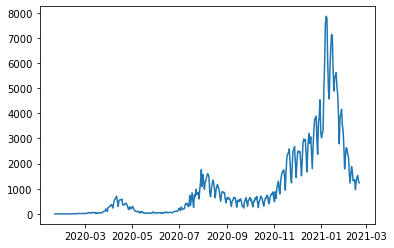

In [122]:
plt.plot(data)

Попробуем стабилизировать дисперсию преоразованием Бокса-Кокса.

# ARIMA

In [18]:
data['cnt_box'], lmbda = stats.boxcox(data.cnt + 1)

Text(0, 0.5, 'Transformed cnt')

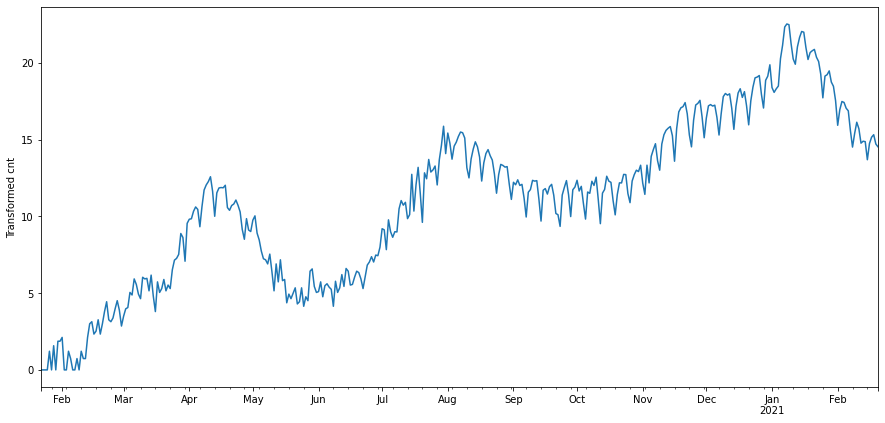

In [24]:
plt.figure(figsize(15,7))
data.cnt_box.plot()
plt.ylabel(u'Transformed cnt')

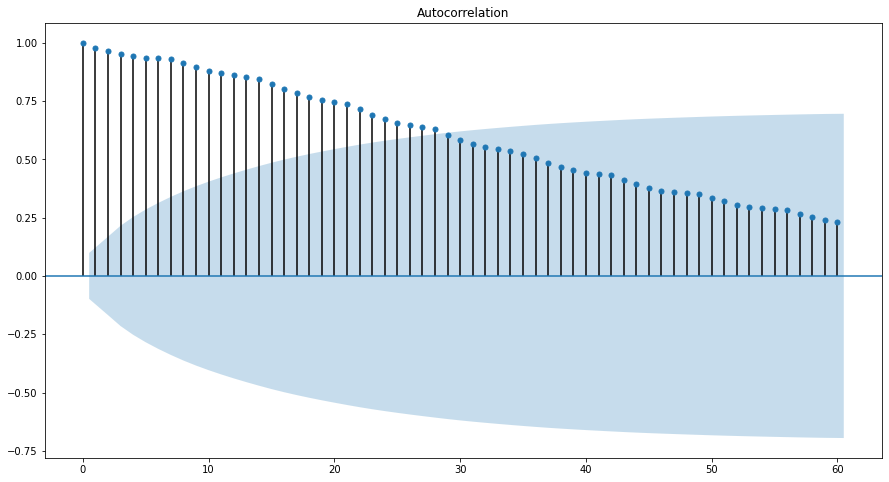

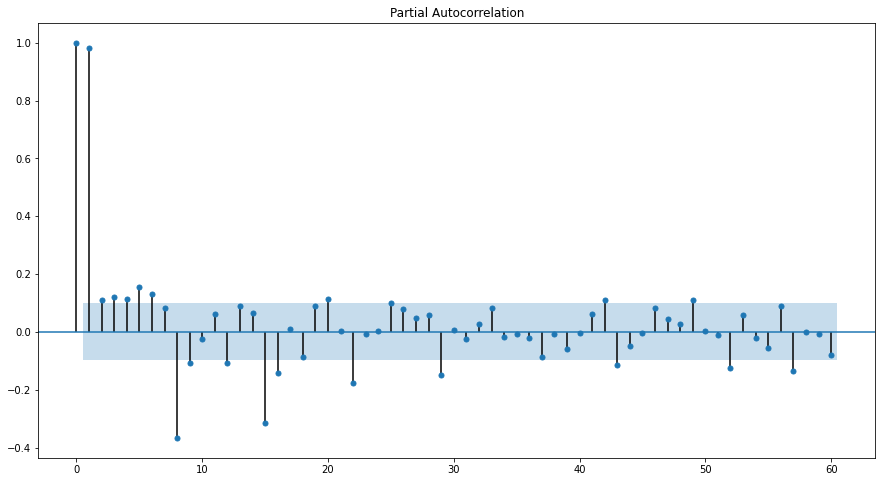

In [20]:
plt.figure(figsize(15,8))
ax = plt.subplot()
sm.graphics.tsa.plot_acf(data.cnt_box.values.squeeze(), lags=60, ax=ax)
plt.show()
ax = plt.subplot()
sm.graphics.tsa.plot_pacf(data.cnt_box.values.squeeze(), lags=60, ax=ax)
plt.show()

<Figure size 1080x720 with 0 Axes>

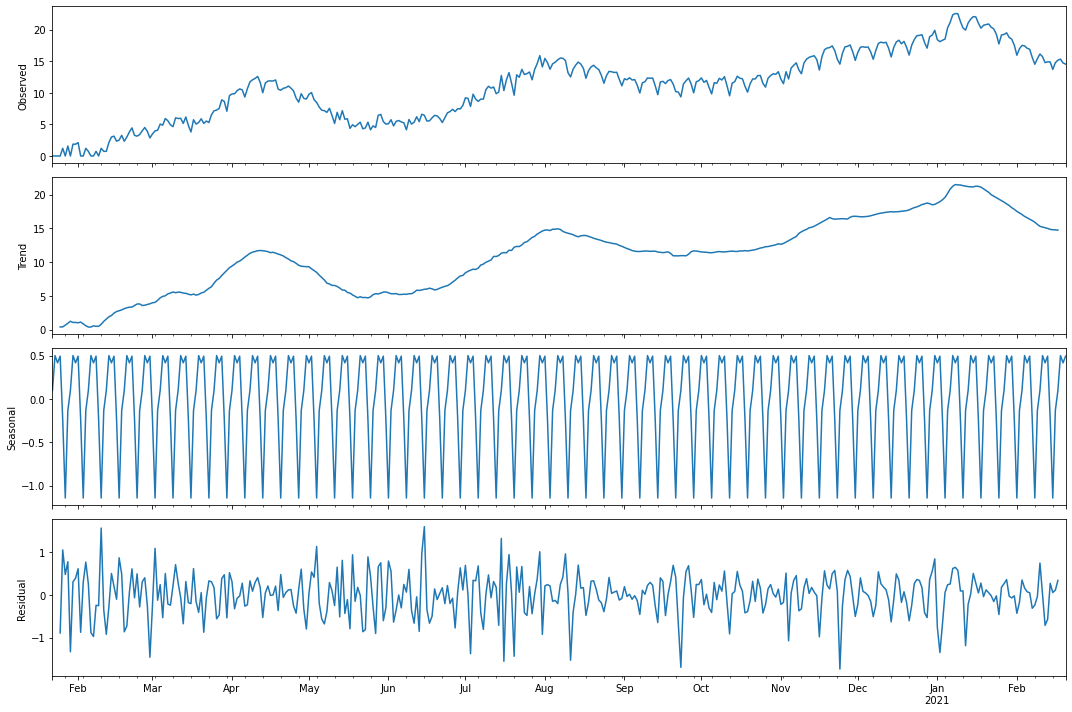

In [23]:
plt.figure(figsize(15,10))
sm.tsa.seasonal_decompose(data.cnt_box).plot()
plt.show()

In [25]:
print("Оптимальный параметр преобразования Бокса-Кокса: %f" % lmbda)
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.cnt_box)[1])

Оптимальный параметр преобразования Бокса-Кокса: 0.181347
Критерий Дики-Фуллера: p=0.060249


Критерий Дики-Фуллера не отвергает гипотезу о нестационарности ряда. Выполним дифференцирование ряда.

In [26]:
data['cnt_box7'] = data.cnt_box - data.cnt_box.shift(7)

In [27]:
data.head(10)

,cnt,cnt_box,cnt_box7
2020-01-22,0,0.000000,NaN
2020-01-23,0,0.000000,NaN
2020-01-24,0,0.000000,NaN
2020-01-25,0,0.000000,NaN
2020-01-26,2,1.215695,NaN
2020-01-27,0,0.000000,NaN
2020-01-28,3,1.576120,NaN
2020-01-29,0,0.000000,0.000000
2020-01-30,4,1.868928,1.868928
2020-01-31,4,1.868928,1.868928


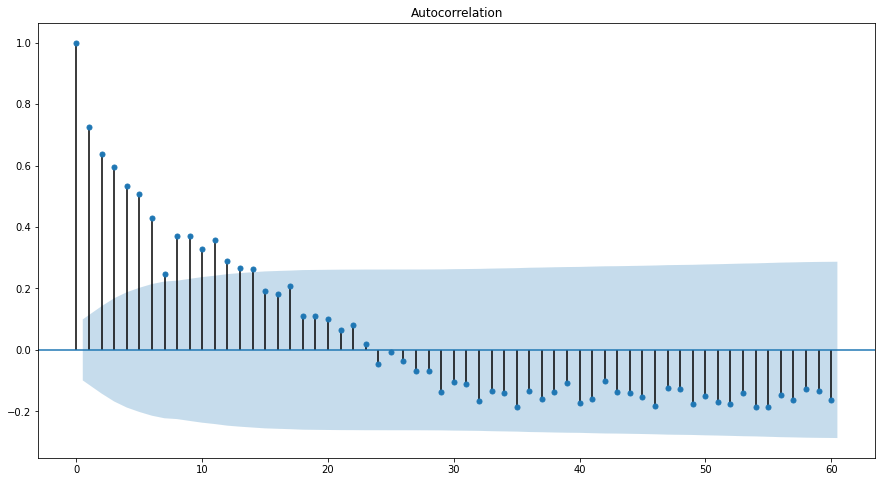

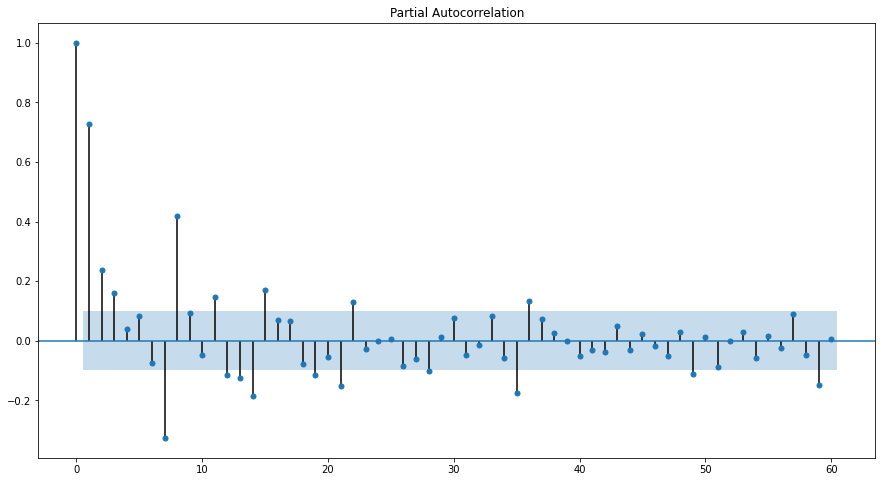

In [42]:
plt.figure(figsize(15,8))
ax = plt.subplot()
sm.graphics.tsa.plot_acf(data.cnt_box7[7:].values.squeeze(), lags=60, ax=ax)
plt.show()
ax = plt.subplot()
sm.graphics.tsa.plot_pacf(data.cnt_box7[7:].values.squeeze(), lags=60, ax=ax)
plt.show()

<Figure size 1080x504 with 0 Axes>

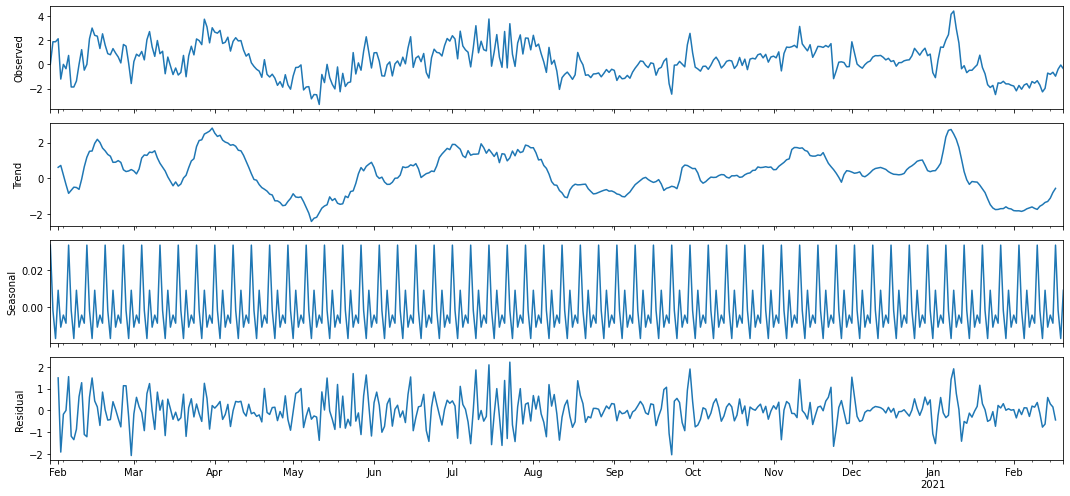

In [36]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(data.cnt_box7[7:]).plot()
plt.show()

In [37]:
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.cnt_box7[7:])[1])

Критерий Дики-Фуллера: p=0.057677


Критерий Дики-Фуллера по-прежнему не отвергает гипотезу о нестационарности ряда. Применим первые разности к уже продифференцированному ряду.

In [38]:
data['cnt_box7_1'] = data.cnt_box7 - data.cnt_box7.shift(1)

In [39]:
data.head(10)

,cnt,cnt_box,cnt_box7,cnt_box7_1
2020-01-22,0,0.000000,NaN,NaN
2020-01-23,0,0.000000,NaN,NaN
2020-01-24,0,0.000000,NaN,NaN
2020-01-25,0,0.000000,NaN,NaN
2020-01-26,2,1.215695,NaN,NaN
2020-01-27,0,0.000000,NaN,NaN
2020-01-28,3,1.576120,NaN,NaN
2020-01-29,0,0.000000,0.000000,NaN
2020-01-30,4,1.868928,1.868928,1.868928
2020-01-31,4,1.868928,1.868928,0.000000


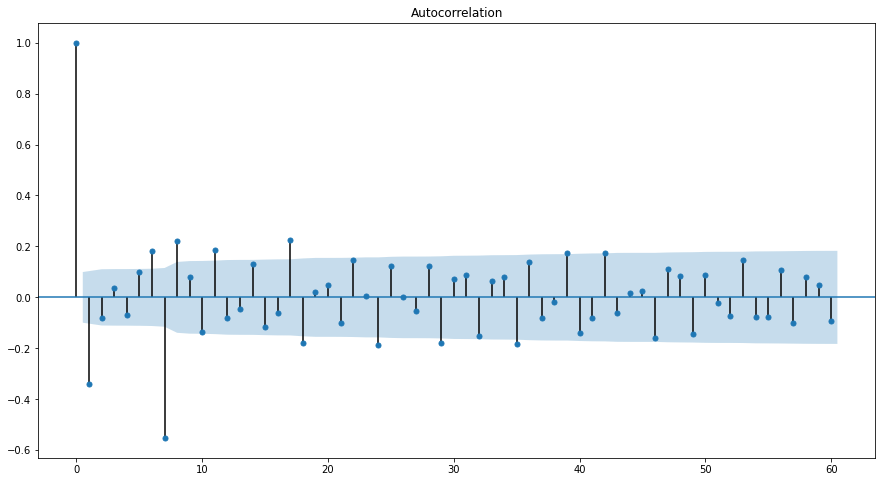

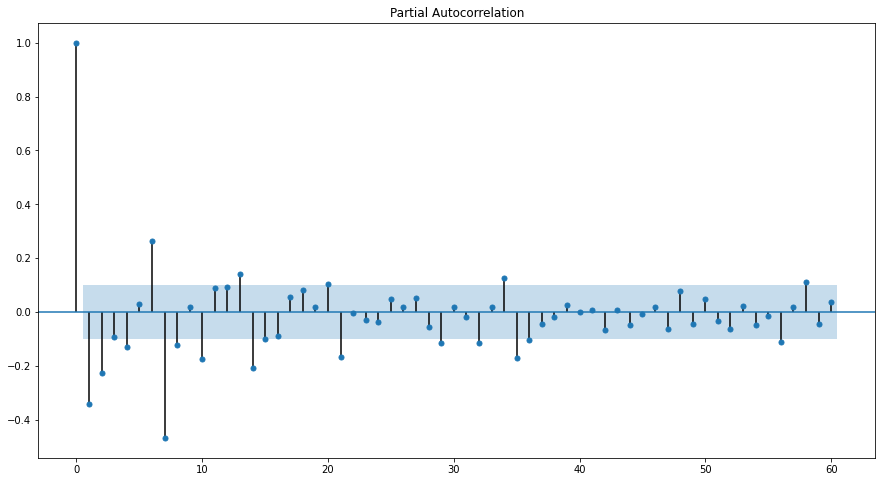

In [41]:
plt.figure(figsize(15,8))
ax = plt.subplot()
sm.graphics.tsa.plot_acf(data.cnt_box7_1[8:].values.squeeze(), lags=60, ax=ax)
plt.show()
ax = plt.subplot()
sm.graphics.tsa.plot_pacf(data.cnt_box7_1[8:].values.squeeze(), lags=60, ax=ax)
plt.show()

Критерий Дики-Фуллера: p=0.000000


<Figure size 1080x504 with 0 Axes>

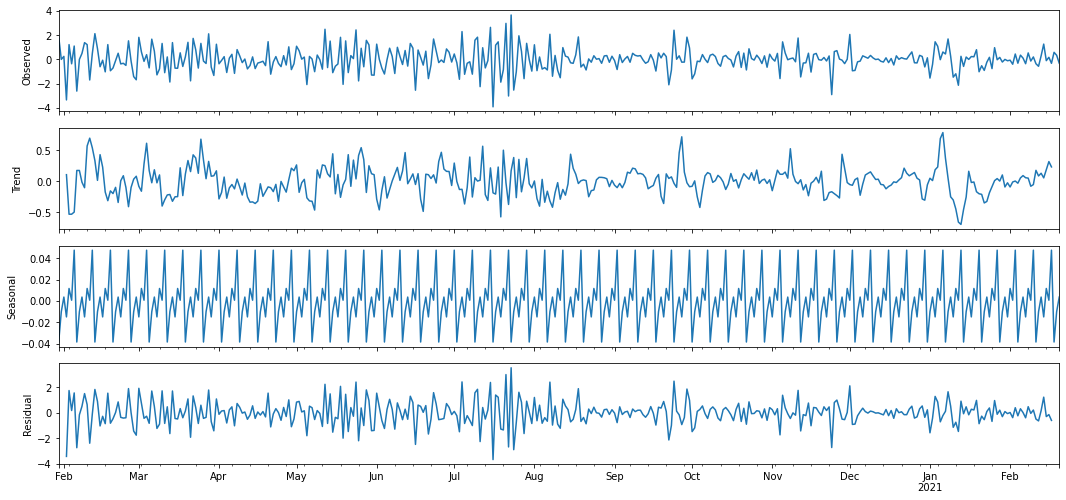

In [43]:
plt.figure(figsize(15,7))
sm.tsa.seasonal_decompose(data.cnt_box7_1[8:]).plot()
print("Критерий Дики-Фуллера: p=%f" % sm.tsa.stattools.adfuller(data.cnt_box7_1[8:])[1])

Критерий Дики-Фуллера теперь отвергает нулевую гипотезу о нестационарности. Выполними перебор параметров для модели ARIMA

In [49]:
ps = range(0, 5)
d=1
qs = range(0, 4)
Ps = range(0, 5)
D=1
Qs = range(0, 1)

In [50]:
from itertools import product

In [51]:
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

100

In [52]:
import warnings
from tqdm import tqdm

In [53]:
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')

for param in tqdm(parameters_list):
    #try except нужен, потому что на некоторых наборах параметров модель не обучается
    try:
        model=sm.tsa.statespace.SARIMAX(data.cnt_box, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12)).fit(disp=-1)
    #выводим параметры, на которых модель не обучается и переходим к следующему набору
    except ValueError:
        print('wrong parameters:', param)
        continue
    except LinAlgError:
        print('wrong parameters:', param)
        continue
    aic = model.aic
    #сохраняем лучшую модель, aic, параметры
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])
    
warnings.filterwarnings('default')

100%|██████████| 100/100 [10:54<00:00,  6.55s/it]


In [54]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())

      parameters          aic
59  (2, 3, 4, 0)   992.932276
79  (3, 3, 4, 0)  1003.714791
78  (3, 3, 3, 0)  1020.413136
98  (4, 3, 3, 0)  1025.082748
73  (3, 2, 3, 0)  1025.137710


In [55]:
print(best_model.summary())

                                 Statespace Model Results                                 
Dep. Variable:                            cnt_box   No. Observations:                  396
Model:             SARIMAX(2, 1, 3)x(4, 1, 0, 12)   Log Likelihood                -486.466
Date:                            Sun, 21 Feb 2021   AIC                            992.932
Time:                                    19:56:38   BIC                           1032.413
Sample:                                01-22-2020   HQIC                          1008.593
                                     - 02-20-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2468      0.004    308.128      0.000       1.239       1.255
ar.L2         -0.9990      0.002   

In [56]:
def invboxcox(y,lmbda):
    if lmbda == 0:
        return(np.exp(y))
    else:
        return(np.exp(np.log(lmbda*y+1)/lmbda))

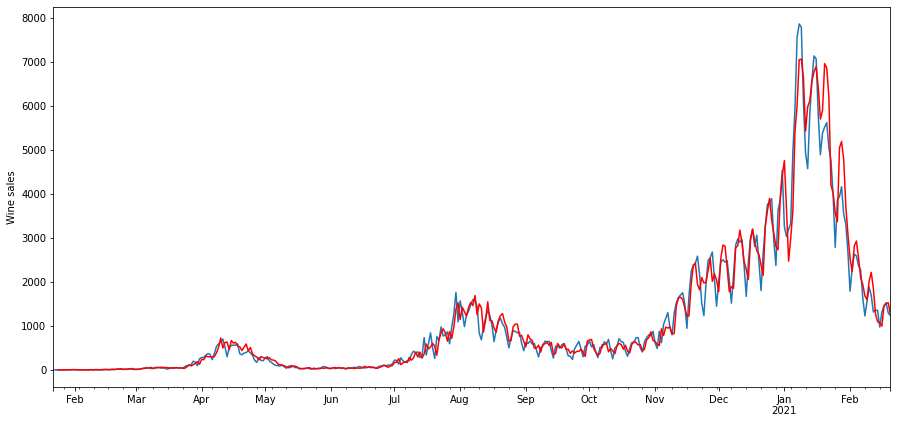

In [57]:
data['model'] = invboxcox(best_model.fittedvalues, lmbda)
plt.figure(figsize(15,7))
data.cnt.plot()
data.model[2:].plot(color='r')
plt.ylabel('Wine sales')
pylab.show()

In [61]:
data2 = data[['cnt']]
date_list = [datetime.datetime.strptime("2021-02-28", "%Y-%m-%d") + relativedelta(days=x) for x in range(21, 29)]
future = pd.DataFrame(index=date_list, columns= data2.columns)

In [62]:
forecast = invboxcox(best_model.predict(start=data.shape[0], end=data.shape[0]+7), lmbda)

In [65]:
forecast

2021-02-21    1091.649348
2021-02-22     978.834698
2021-02-23    1021.151193
2021-02-24    1248.664965
2021-02-25    1290.430716
2021-02-26    1354.450725
2021-02-27    1199.797902
2021-02-28     932.971767
Freq: D, dtype: float64

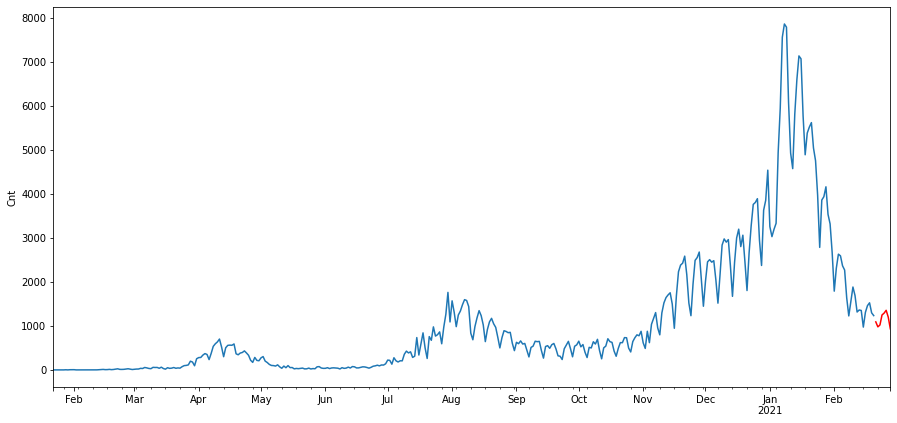

In [64]:
plt.figure(figsize(15,7))
data2.cnt.plot()
forecast.plot(color='r')
plt.ylabel('Cnt')
plt.show()

# Linear regression

In [24]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [123]:
def prepareData(data, lag_start=5, lag_end=20, test_size=0.15):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    test_index = int(len(data)*(1-test_size))

    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data.index = pd.to_datetime(data.index)
    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    data.drop(["weekday"], axis=1, inplace=True)
    
    data = data.dropna()
    xs = data.iloc[test_index:]
    data = data.reset_index(drop=True)

    
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]
    
    return X_train, X_test, y_train, y_test, xs

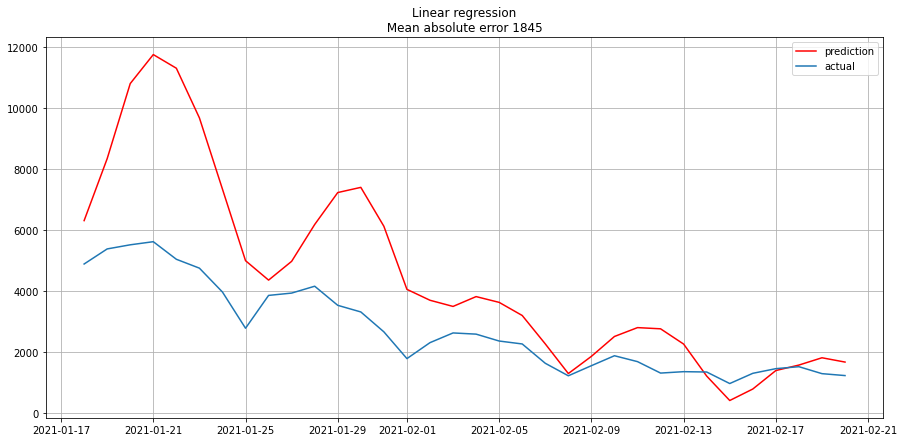

In [124]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

date_list = [datetime.datetime.strptime("2021-02-28", "%Y-%m-%d") + relativedelta(days=x) for x in range(21, 29)]
f = pd.DataFrame(index=date_list, columns= data.columns)
data = data.append(f)
X_train, X_test, y_train, y_test, xs = prepareData(data)
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
plt.figure(figsize=(15, 7))
plt.plot(xs.index, prediction, "r", label="prediction")
plt.plot(xs[:len(y_test.values)].index, y_test.values, label="actual")
plt.legend(loc="best")
plt.title("Linear regression\n Mean absolute error {} ".format(round(mean_absolute_error(prediction, y_test))))
plt.grid(True);